## Spatially resolved Mass-Metallicity relation for EDGE, at CALIFA resolution.

In [1]:
import os
import numpy as np
from astropy.table import Table, join
import matplotlib.pyplot as plt
from astropy import units as u
import h5py 
import edge_pydb
from edge_pydb.xy2hist import xy2hist
from edge_pydb.conversion import stmass_pc2, msd_co, ZOH_M13
np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Inspect the CALIFA HDF5 file

In [2]:
# To list all files
edge_pydb.listfiles()

edge_bbpars_natv.csv
edge_bbpars_smo7.csv
edge_hiflux.csv
edge_rfpars.csv
edge_califa.csv
edge_leda.csv
edge_ned.csv
edge_nsa.csv
edge_rdist.csv
edge_wise.csv
edge_coflux_e20.csv
edge_coflux_natv.csv
edge_coflux_smo6.csv
edge_coflux_smo7.csv
edge_coobs_d20.csv
edge_coobs_de10.csv
edge_coobs_de20.csv
edge_coobs_e20.csv
bb_natv_fitvd_bbmsk.csv
bb_natv_fitvd_bbmsk_freepa.csv
bb_natv_fitvd_dilmsk.csv
bb_natv_fitvd_dilmsk_freepa.csv
bb_natv_fixvd_bbmsk.csv
bb_natv_fixvd_bbmsk_freepa.csv
bb_natv_fixvd_dilmsk.csv
bb_natv_fixvd_dilmsk_freepa.csv
bb_smo5_fitvd_bbmsk.csv
bb_smo5_fitvd_bbmsk_freepa.csv
bb_smo5_fitvd_dilmsk.csv
bb_smo5_fitvd_dilmsk_freepa.csv
bb_smo5_fixvd_bbmsk.csv
bb_smo5_fixvd_bbmsk_freepa.csv
bb_smo5_fixvd_dilmsk.csv
bb_smo5_fixvd_dilmsk_freepa.csv
bb_smo7_fitvd_bbmsk.csv
bb_smo7_fitvd_bbmsk_freepa.csv
bb_smo7_fitvd_dilmsk.csv
bb_smo7_fitvd_dilmsk_freepa.csv
bb_smo7_fixvd_bbmsk.csv
bb_smo7_fixvd_bbmsk_freepa.csv
bb_smo7_fixvd_dilmsk.csv
bb_smo7_fixvd_dilmsk_freepa.csv
rprof_de

['edge_bbpars_natv.csv',
 'edge_bbpars_smo7.csv',
 'edge_hiflux.csv',
 'edge_rfpars.csv',
 'edge_califa.csv',
 'edge_leda.csv',
 'edge_ned.csv',
 'edge_nsa.csv',
 'edge_rdist.csv',
 'edge_wise.csv',
 'edge_coflux_e20.csv',
 'edge_coflux_natv.csv',
 'edge_coflux_smo6.csv',
 'edge_coflux_smo7.csv',
 'edge_coobs_d20.csv',
 'edge_coobs_de10.csv',
 'edge_coobs_de20.csv',
 'edge_coobs_e20.csv',
 'bb_natv_fitvd_bbmsk.csv',
 'bb_natv_fitvd_bbmsk_freepa.csv',
 'bb_natv_fitvd_dilmsk.csv',
 'bb_natv_fitvd_dilmsk_freepa.csv',
 'bb_natv_fixvd_bbmsk.csv',
 'bb_natv_fixvd_bbmsk_freepa.csv',
 'bb_natv_fixvd_dilmsk.csv',
 'bb_natv_fixvd_dilmsk_freepa.csv',
 'bb_smo5_fitvd_bbmsk.csv',
 'bb_smo5_fitvd_bbmsk_freepa.csv',
 'bb_smo5_fitvd_dilmsk.csv',
 'bb_smo5_fitvd_dilmsk_freepa.csv',
 'bb_smo5_fixvd_bbmsk.csv',
 'bb_smo5_fixvd_bbmsk_freepa.csv',
 'bb_smo5_fixvd_dilmsk.csv',
 'bb_smo5_fixvd_dilmsk_freepa.csv',
 'bb_smo7_fitvd_bbmsk.csv',
 'bb_smo7_fitvd_bbmsk_freepa.csv',
 'bb_smo7_fitvd_dilmsk.csv',
 'bb

In [3]:
# To list specific type (csv or hdf5)
edge_pydb.listfiles("hdf5")

NGC4047.pipe3d.hdf5
NGC4047.cocube_smo7.hdf5
NGC4047.comom_smo7.hdf5


['NGC4047.pipe3d.hdf5', 'NGC4047.cocube_smo7.hdf5', 'NGC4047.comom_smo7.hdf5']

In [4]:
try:
    califatab = edge_pydb.getfiles('edge.pipe3d.hdf5')
    print('Working on full EDGE database')
except:
    print('Working on NGC 4047 data')
    califatab = edge_pydb.getfiles('NGC4047.pipe3d.hdf5')
f = h5py.File(califatab, 'r')
list(f.keys())

Working on NGC 4047 data


['ELINES_rg',
 'ELINES_rg.__table_column_meta__',
 'ELINES_sm',
 'ELINES_sm.__table_column_meta__',
 'SFH_rg',
 'SFH_rg.__table_column_meta__',
 'SFH_sm',
 'SFH_sm.__table_column_meta__',
 'SSP_rg',
 'SSP_rg.__table_column_meta__',
 'SSP_sm',
 'SSP_sm.__table_column_meta__',
 'flux_elines_rg',
 'flux_elines_rg.__table_column_meta__',
 'flux_elines_sm',
 'flux_elines_sm.__table_column_meta__',
 'indices_rg',
 'indices_rg.__table_column_meta__',
 'indices_sm',
 'indices_sm.__table_column_meta__']

## Build the table

In [5]:
felines = Table.read(califatab, path='flux_elines_rg')
ssp_rg  = Table.read(califatab, path='SSP_rg')
join2   = join(felines, ssp_rg)
# For stellar surface density we need distance
califa  = Table.read(edge_pydb.getfiles('edge_califa.csv'), format='ascii.ecsv')
dists   = Table([califa['Name'], califa['caDistMpc']])
join3   = join(join2, dists, keys='Name')
print(join3.colnames)

['Name', 'ix', 'iy', 'ra_off', 'dec_off', 'rad_arc', 'azi_ang', 'flux_[OII]3727', 'flux_[OIII]5007', 'flux_[OIII]4959', 'flux_Hbeta', 'flux_Halpha', 'flux_[NII]6583', 'flux_[NII]6548', 'flux_[SII]6717', 'flux_[SII]6731', 'vel_[OII]3727', 'vel_[OIII]5007', 'vel_[OIII]4959', 'vel_Hbeta', 'vel_Halpha', 'vel_[NII]6583', 'vel_[NII]6548', 'vel_[SII]6717', 'vel_[SII]6731', 'disp_[OII]3727', 'disp_[OIII]5007', 'disp_[OIII]4959', 'disp_Hbeta', 'disp_Halpha', 'disp_[NII]6583', 'disp_[NII]6548', 'disp_[SII]6717', 'disp_[SII]6731', 'EW_[OII]3727', 'EW_[OIII]5007', 'EW_[OIII]4959', 'EW_Hbeta', 'EW_Halpha', 'EW_[NII]6583', 'EW_[NII]6548', 'EW_[SII]6717', 'EW_[SII]6731', 'e_flux_[OII]3727', 'e_flux_[OIII]5007', 'e_flux_[OIII]4959', 'e_flux_Hbeta', 'e_flux_Halpha', 'e_flux_[NII]6583', 'e_flux_[NII]6548', 'e_flux_[SII]6717', 'e_flux_[SII]6731', 'e_vel_[OII]3727', 'e_vel_[OIII]5007', 'e_vel_[OIII]4959', 'e_vel_Hbeta', 'e_vel_Halpha', 'e_vel_[NII]6583', 'e_vel_[NII]6548', 'e_vel_[SII]6717', 'e_vel_[SII]6

## Calculate the metallicity using O3N2 estimator

In [6]:
ZOH = ZOH_M13(join3, method='o3n2', err=False)
print('Number of points:',len(ZOH))

Number of points: 2809


## Plot the mass-metallicity relation

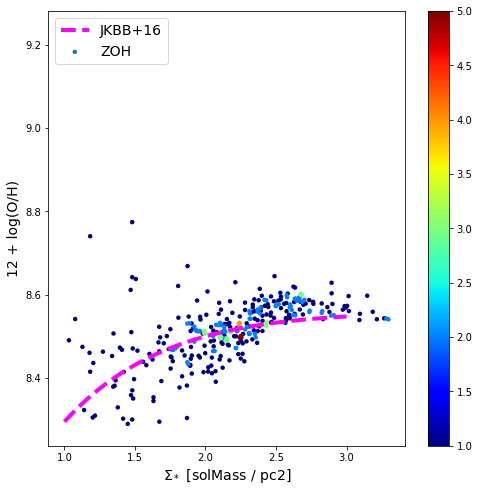

In [7]:
sig_star = stmass_pc2(join3['mass_ssp'], dist=join3['caDistMpc'].quantity)
not_nan = (~np.isnan(sig_star)) & (~np.isnan(ZOH)) & (sig_star>0) & (ZOH>0)
x_det, y_det, z_det, *hist = xy2hist(np.log10(sig_star[not_nan]), 
                                     ZOH[not_nan], log=False)

fig, ax = plt.subplots(figsize=(8,8))
cm = plt.cm.get_cmap('jet')
sc = ax.scatter(x_det, y_det, c=z_det, s=20, edgecolor='', cmap=cm)
# From MaNGA paper, doi:10.1093/mnras/stw1984
xmod = np.linspace(1,3,num=50)
ymod = 8.55 + 0.014*(xmod-3.14)*np.exp(-(xmod-3.14))
plt.plot(xmod,ymod,color='magenta',ls='--',lw=4,label='JKBB+16')
plt.legend(loc='upper left',fontsize=14)
plt.xlabel('$\Sigma_*$ ['+str(sig_star.unit)+']',fontsize=14)
plt.ylabel('12 + log(O/H)',fontsize=14)
plt.colorbar(sc)

## Calculate the metallicity using N2 estimator

Number of points: 2809


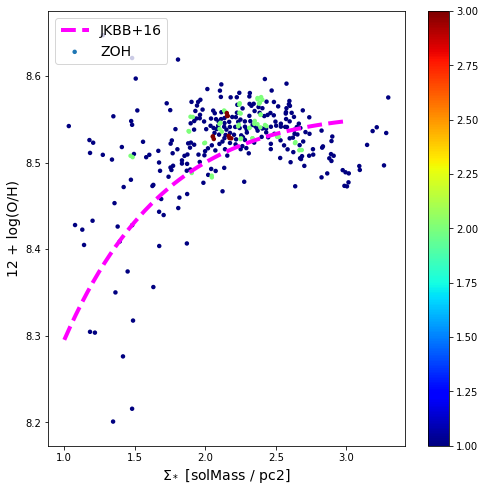

In [8]:
ZOH = ZOH_M13(join3, method='n2', err=False)
print('Number of points:',len(ZOH))
not_nan = (~np.isnan(sig_star)) & (~np.isnan(ZOH)) & (sig_star>0) & (ZOH>0)
x_det, y_det, z_det, *hist = xy2hist(np.log10(sig_star[not_nan]), 
                                     ZOH[not_nan], log=False)

fig, ax = plt.subplots(figsize=(8,8))
cm = plt.cm.get_cmap('jet')
sc = ax.scatter(x_det, y_det, c=z_det, s=20, edgecolor='', cmap=cm)
# From MaNGA paper, doi:10.1093/mnras/stw1984
xmod = np.linspace(1,3,num=50)
ymod = 8.55 + 0.014*(xmod-3.14)*np.exp(-(xmod-3.14))
plt.plot(xmod,ymod,color='magenta',ls='--',lw=4,label='JKBB+16')
plt.legend(loc='upper left',fontsize=14)
plt.xlabel('$\Sigma_*$ ['+str(sig_star.unit)+']',fontsize=14)
plt.ylabel('12 + log(O/H)',fontsize=14)
plt.colorbar(sc)

## Plot the BPT diagram.

In [9]:
# BPT
fluxtab = join3
N2F = fluxtab['flux_[NII]6583']
O3F = fluxtab['flux_[OIII]5007']
HaF = fluxtab['flux_Halpha']
HbF = fluxtab['flux_Hbeta']
BPT = edge_pydb.conversion.bpt_type(N2F, O3F, 
                                    HaF, HbF, fluxtab['EW_Halpha'])

In [10]:
x1 = np.linspace(-3, 0.3, 100)
x2 = np.linspace(-3, -0.1, 100)
x3 = np.linspace(-0.4346, 2,100)
kewley01 = lambda nii: 1.19 + 0.61/(nii - 0.47) 
kauffm03 = lambda nii: 1.30 + 0.61/(nii - 0.05) 
cidfer10 = lambda nii: 0.48 + 1.01*nii  
xval = np.log10(N2F/HaF)
yval = np.log10(O3F/HbF)

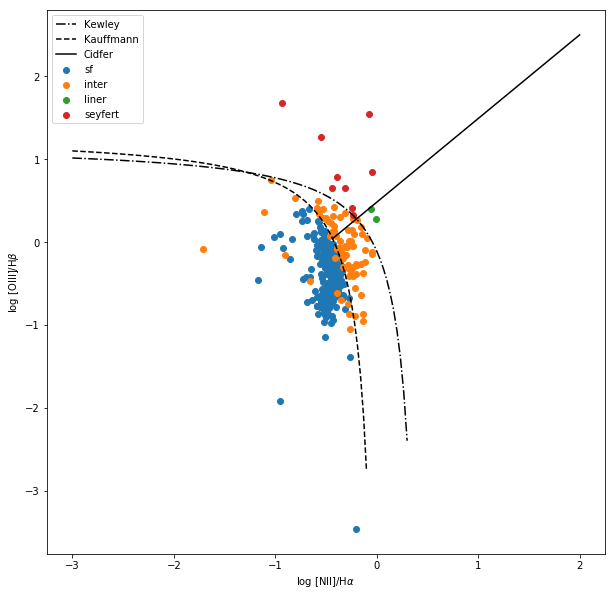

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(xval[BPT==-1], yval[BPT==-1], label="sf")
plt.scatter(xval[BPT==0], yval[BPT==0], label="inter")
plt.scatter(xval[BPT==1], yval[BPT==1], label="liner")
plt.scatter(xval[BPT==2], yval[BPT==2], label="seyfert")
plt.plot(x1, kewley01(x1), 'k-.', label="Kewley")
plt.plot(x2, kauffm03(x2), 'k--', label="Kauffmann")
plt.plot(x3, cidfer10(x3), 'k-', label="Cidfer")
plt.xlabel(r'log [NII]/H$\alpha$')
plt.ylabel(r'log [OIII]/H$\beta$')
plt.legend()
plt.show()

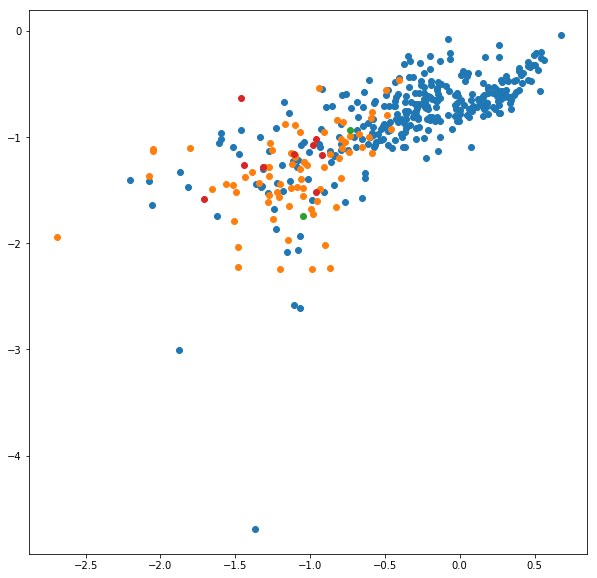

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(np.log10(N2F)[BPT==-1], np.log10(O3F)[BPT==-1])
plt.scatter(np.log10(N2F)[BPT==0], np.log10(O3F)[BPT==0])
plt.scatter(np.log10(N2F)[BPT==1], np.log10(O3F)[BPT==1])
plt.scatter(np.log10(N2F)[BPT==2], np.log10(O3F)[BPT==2])